## Data Missing Hingga Normalisasi Data
Cara menanggulangi data yang hilang hingga mempelajari data yang normal.


### Melakukan pengecekan untuk nilai NULL yang ada

In [1]:
import pandas as pd

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data_missingvalue.csv")

print(csv_data.isnull().values.any())

True


### Solusi mengisi Missing Value
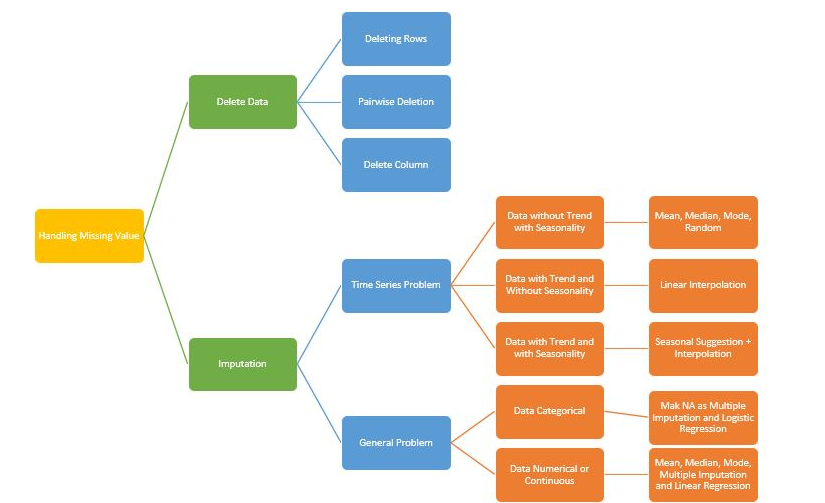
Dalam diagram diatas, perlu diketahui bahwa kasus kehilangan data bisa diatasi dengan berbagai cara. Bahkan, melakukan penghapusan data juga merupakan solusi yang bisa menjadi pilihan apabila jika dirasa mengisi nilai kosong akan memberikan pengaruh yang kurang bagus terhadap analisa, atau apabila pertimbangan data yang dihapus atau data yang hilang sedikit dan tidak memberikan terlalu banyak sumbangsih untuk analisa yang akan dilakukan. Penghapusan data bisa langsung pada baris data tersebut atau langsung satu kolom data. Pada solusi kedua yaitu menggunakan imputation (pengisian data yang kosong) bisa tergantung dari permasalahannya. Khusus untuk masalah yang berhubungan forecasting atau peramalan tergantung dari data yang ada (lebih lengkap bisa dilihat pada gambar). Khusus untuk general problem tergantung jenis datanya. Jika yang hilang data kategorikal atau bersifat string bisa menggunakna relasi antar kolom dengan Logistic Regression, jika numerical bisa menggunakan statistik sederhana dan linear regression.

### Mengisi dengan Mean

In [4]:
print(csv_data.mean())

CustomerID                100.500000
Age                        38.939698
Annual Income (k$)         61.005051
Spending Score (1-100)     50.489899
dtype: float64


C:\Users\ASUS\AppData\Local\Temp/ipykernel_4844/1603357476.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(csv_data.mean())


In [5]:
print("Dataset yang masih terdapat nilai kosong ! :")
print(csv_data.head(10))

Dataset yang masih terdapat nilai kosong ! :
   CustomerID   Genre        Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  19.000000           15.000000               39.000000
1           2    Male  38.939698           15.000000               81.000000
2           3  Female  20.000000           61.005051                6.000000
3           4  Female  23.000000           16.000000               77.000000
4           5  Female  31.000000           17.000000               50.489899
5           6  Female  22.000000           61.005051               76.000000
6           7  Female  35.000000           18.000000                6.000000
7           8  Female  23.000000           18.000000               94.000000
8           9    Male  64.000000           19.000000               50.489899
9          10  Female  30.000000           19.000000               72.000000


In [6]:
# csv_data=csv_data.fillna(csv_data.median())
csv_data=csv_data.fillna(csv_data.mean())
print("Dataset yang sudah diproses Handling Missing Values dengan Mean :")
print(csv_data.head(10))

Dataset yang sudah diproses Handling Missing Values dengan Mean :
   CustomerID   Genre        Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  19.000000           15.000000               39.000000
1           2    Male  38.939698           15.000000               81.000000
2           3  Female  20.000000           61.005051                6.000000
3           4  Female  23.000000           16.000000               77.000000
4           5  Female  31.000000           17.000000               50.489899
5           6  Female  22.000000           61.005051               76.000000
6           7  Female  35.000000           18.000000                6.000000
7           8  Female  23.000000           18.000000               94.000000
8           9    Male  64.000000           19.000000               50.489899
9          10  Female  30.000000           19.000000               72.000000


C:\Users\ASUS\AppData\Local\Temp/ipykernel_4844/3573516302.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  csv_data=csv_data.fillna(csv_data.mean())


## Normalisasi Data
### Metode Normalisasi
Ada berbagai macam metode normalisasi, seperti MinMax, Zscore, Decimal Scaling, Sigmoid, dan Softmax. Pemakaiannya tergantung pada kebutuhan dari dataset dan jenis analisa yang dilakukan.
#### MinMax
Metode Min-Max merupakan metode yang cukup bisa dibayangkan karena termasuk metode normalisasi yang bersifat linier dengan data aslinya. Namun, metode ini bisa menyebabkan out of bound pada beberapa kasus.
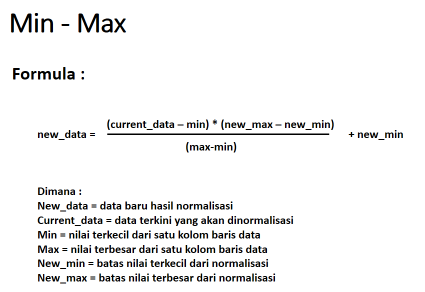
* Kenapa bisa terjadi out of bound? Out of Bound terjadi apabila ada data baru masuk, dimana data tersebut melebihi nilai maksimal atau nilai minimal dari data yang sudah ada. Secara otomatis, perhitungan yang berlaku pada data yang sudah diperoleh tadi harus diulangi lagi semuanya dengan data baru yang masuk atau data baru yang mempunyai nilai maksimal/minimum yang melebihi tadi tidak bisa diproses. Karena kekurangan inilah MinMax tidak cocok untuk analisa real time / evolving system. Dimungkinkan dalam kasus-kasus terjadi kasus out of bound pada MinMax.

* MinMax sangat dianjurkan untuk kasus-kasus berbasis time frame analisis dan forecasting. Perhitungan dari metode ini cukup mengurangi data yang asli dengan nilai minimal dari fitur tersebut, kemudian hasil tersebut dikalikan dari hasil pengurangan nilai maximal yang baru dengan nilai minimal yang baru dan kemudian dibagi dengan nilai max dan min data di setiap fitur terakhir ditambah dengan nilai min yang baru.

#### Z-Score
Zscore adalah metode yang sering digunakan dalam berbagai penelitian berbasis data mining atau data science. Z-score merupakan metode normalisasi yang berdasarkan mean (nilai rata-rata) dan standard deviation (deviasi standar) dari data. Kenapa Z-Score sangat populer? Selain tidak banyak variabel yang diset dalam perhitungannya. Z-Score sangat dinamis dalam melakukan perhitungan normalisasi. Kelemahan dari Z-Score adalah prosesnya akan terulang lagi jika ada data baru yang masuk. Selain itu elemen yang dibutuhkan untuk perhitungan Z-Score juga membutuhkan proses yang cukup lama baik standar deviation ataupun rata-rata dari setiap kolom.
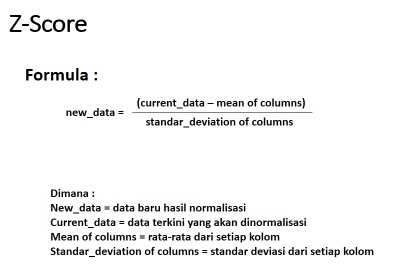

#### Decimal Scaling
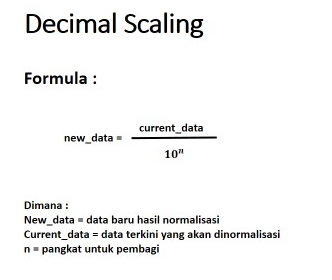

#### Softmax
Softmax merupakan metode normalisasi pengembangan transformasi secara linier. Output range-nya adalah 0-1. Metode ini sangat berguna pada saat data yang ada melibatkan data outlier.
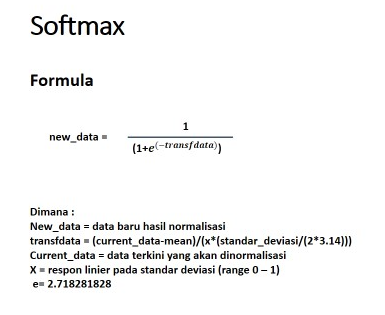

#### Sigmoid
Sigmoidal merupakan metode normalization melakukan normalisasi data secara nonlinier ke dalam range -1 s/d 1 dengan menggunakan fungsi sigmoid. Metode ini sangat berguna pada saat data yang ada melibatkan data outlier. Data outlier adalah data yang keluar jauh dari jangkauan data lainnya
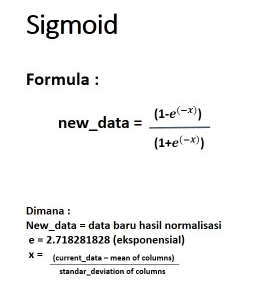

### Praktek Normalisasi menggunakan Scikit Learn pada Python

In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data.csv")
array = csv_data.values				

In [8]:
X = array[:,2:5] #memisahkan fitur dari dataset. 
Y = array[:,0:1]  #memisahkan class dari dataset

In [9]:
dataset=pd.DataFrame({'Customer ID':array[:,0],'Gender':array[:,1],'Age':array[:,2],'Income':array[:,3],'Spending Score':array[:,4]})
print("dataset sebelum dinormalisasi :")
print(dataset.head(10))

dataset sebelum dinormalisasi :
  Customer ID  Gender Age Income Spending Score
0           1    Male  19     15             39
1           2    Male  21     15             81
2           3  Female  20     16              6
3           4  Female  23     16             77
4           5  Female  31     17             40
5           6  Female  22     17             76
6           7  Female  35     18              6
7           8  Female  23     18             94
8           9    Male  64     19              3
9          10  Female  30     19             72


In [10]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) #inisialisasi normalisasi MinMax
data = min_max_scaler.fit_transform(X) #transformasi MinMax untuk fitur
dataset = pd.DataFrame({'Age':data[:,0],'Income':data[:,1],'Spending Score':data[:,2],'Customer ID':array[:,0],'Gender':array[:,1]})

print("dataset setelah dinormalisasi :")
print(dataset.head(10))

dataset setelah dinormalisasi :
        Age    Income  Spending Score Customer ID  Gender
0  0.019231  0.000000        0.387755           1    Male
1  0.057692  0.000000        0.816327           2    Male
2  0.038462  0.008197        0.051020           3  Female
3  0.096154  0.008197        0.775510           4  Female
4  0.250000  0.016393        0.397959           5  Female
5  0.076923  0.016393        0.765306           6  Female
6  0.326923  0.024590        0.051020           7  Female
7  0.096154  0.024590        0.948980           8  Female
8  0.884615  0.032787        0.020408           9    Male
9  0.230769  0.032787        0.724490          10  Female
